## 1.Importing libraries 

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
import plotly.subplots as sp

### 2.Loading Dataset for retail store

In [119]:
df = pd.read_csv('retail_sales_dataset.csv')


### 3.Exploring the data

In [120]:
df.head()
df.tail()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


### 4.Finding Null Values 

In [121]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

### 5.Finding Duplicates

In [122]:
df.duplicated().sum()

0

### 6.Identifying Outliers 

<Axes: >

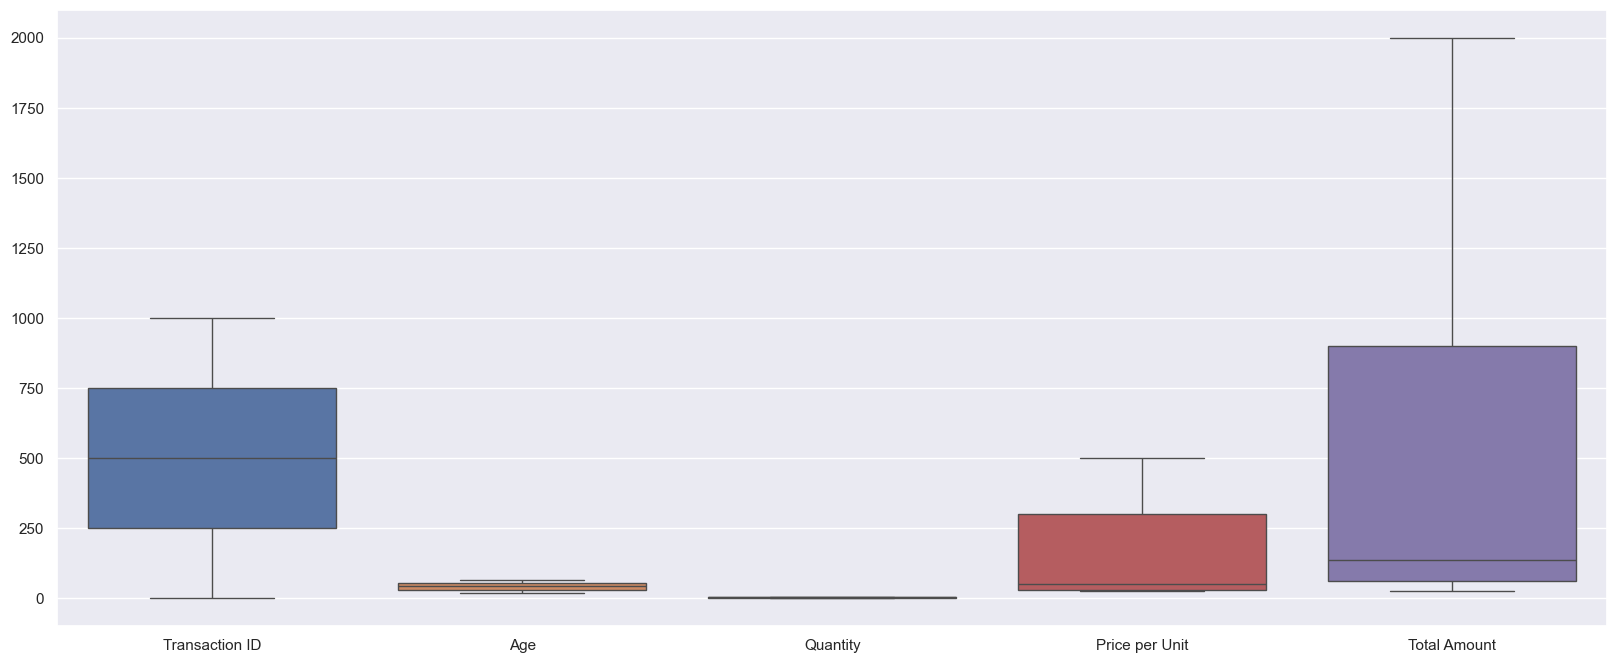

In [123]:
sns.boxplot(df)

### 7.Renaming Columns

In [124]:
df.rename(columns = {'Total Amount':'Total_Sales'}, inplace = True)
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total_Sales
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


### 8.Calculating Statistical Values 

In [125]:
df.describe()
mode_Age= statistics.mode(df['Age'])
mode_Quantity= statistics.mode(df['Quantity'])
mode_PriceperUnit= statistics.mode(df['Price per Unit'])
mode_TotalSales= statistics.mode(df['Total_Sales'])
print("Age_mode= ", mode_Age)
print("Quantity_mode= ", mode_Quantity)
print("PriceperUnit_mode= ", mode_PriceperUnit)
print("TotalAmount_mode= ", mode_TotalSales)




Age_mode=  64
Quantity_mode=  4
PriceperUnit_mode=  50
TotalAmount_mode=  50


In [126]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total_Sales
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


### 9.Plotting the data 

Text(0.5, 1.0, 'Total Sales w.r.t Date')

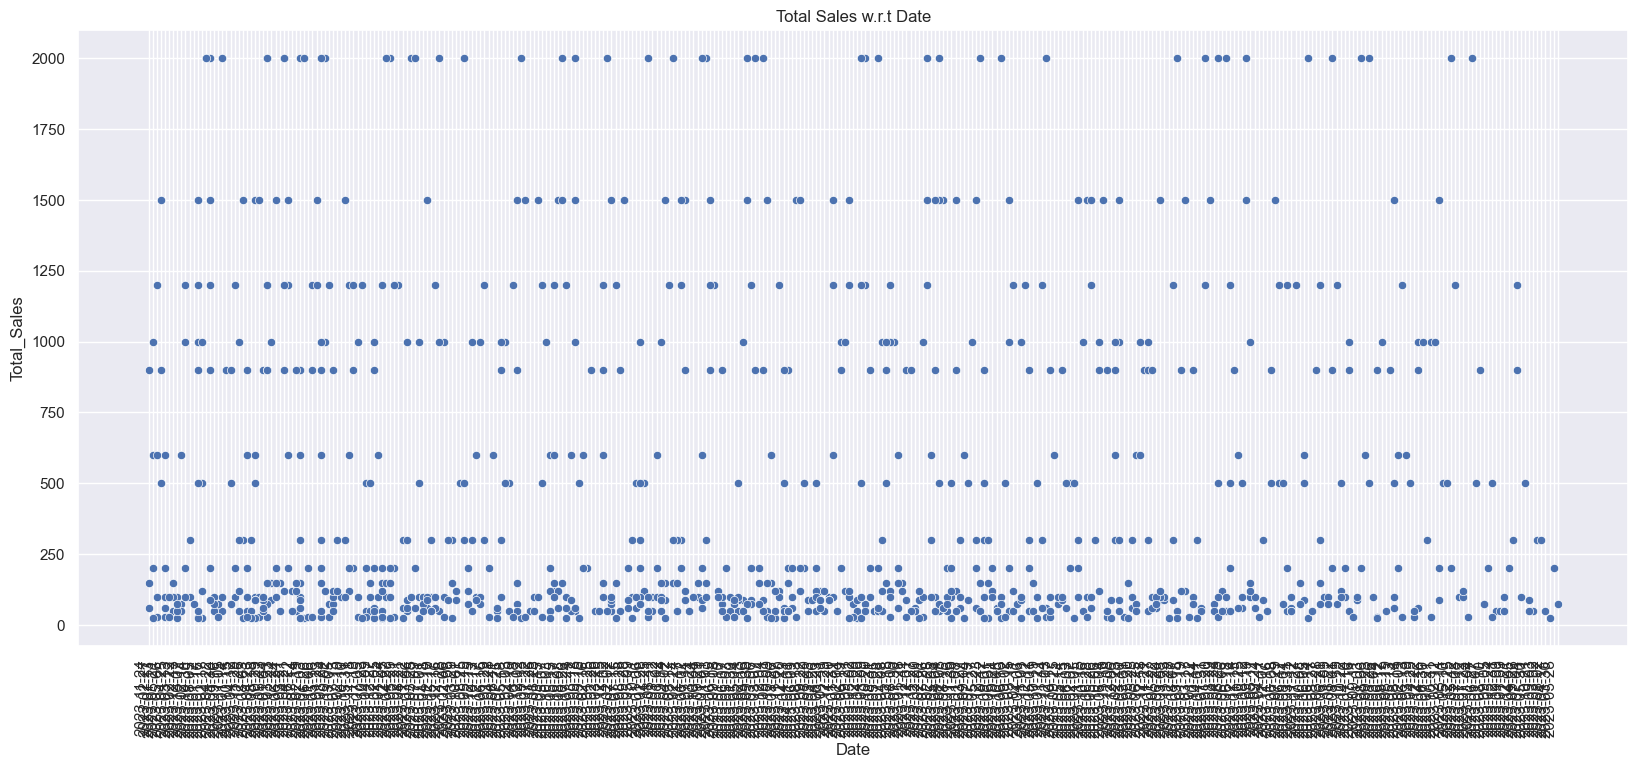

In [127]:
# ploting  
sns.set(rc={'figure.figsize':(20,8)})
sns.scatterplot(data=df, x="Date", y="Total_Sales")
plt.xticks(rotation=90,horizontalalignment='right')
# labeling 
plt.xlabel("Date")
plt.ylabel("Total_Sales")
plt.title("Total Sales w.r.t Date")


In [128]:
# plot using plotly 
fig= px.line(df, x="Date", y="Total_Sales", title= "Total Sale w.r.t Date")
fig.show()


### 10.Ordering the Date column

In [129]:
#Ordering the data for prop
df = df.sort_values(by='Date')
df['Date']


521    2023-01-01
179    2023-01-01
558    2023-01-01
302    2023-01-02
978    2023-01-02
          ...    
232    2023-12-29
804    2023-12-29
856    2023-12-31
210    2024-01-01
649    2024-01-01
Name: Date, Length: 1000, dtype: object

### 11.Plotting using Plotly

In [130]:
# plot using plotly 
fig= px.line(df, x="Date", y="Total_Sales",  title= "Total sale w.r.t Date")
# Changing color of line in graph
fig.update_traces(line_color='#FFA15A')
fig.show()


In [131]:
# plot using plotly 
fig= px.line(df,x="Product Category", y="Gender",  title= "Total sale w.r.t Date")
# Changing color of line in graph
fig.update_traces(line_color='#FFA15A')
fig.show()


In [132]:
# plot using plotly 
fig= px.line(df, x="Date", y="Product Category",  title= "Sales_Product Category  w.r.t Date")
# Changing color of line in graph
fig.update_traces(line_color='#FFA15A')
fig.show()

### 12.Finding Seasonal Trends

In [133]:
import plotly.graph_objs as go
from datetime import datetime
df['year'] = pd.to_datetime(df['Date']).dt.year
print(df)

year=df['year']
Amount= df['Total_Sales']
all_data_trace = go.Scatter(
    x=year,
    y=Amount,
    mode='lines',  # Line chart
    name='Overall Trend'
)
traces=[]
x=[1,2024]
y=[1,5000]

# Add the main trace to the list
traces.append(all_data_trace)

# Create the figure and add traces
fig = go.Figure(data=traces)

fig.update_layout(
    title='Seasonal Trends',
    xaxis_title='Date',
    yaxis_title='Amount',
    showlegend=True  
)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
521             522  2023-01-01     CUST522    Male   46           Beauty   
179             180  2023-01-01     CUST180    Male   41         Clothing   
558             559  2023-01-01     CUST559  Female   40         Clothing   
302             303  2023-01-02     CUST303    Male   19      Electronics   
978             979  2023-01-02     CUST979  Female   19           Beauty   
..              ...         ...         ...     ...  ...              ...   
232             233  2023-12-29     CUST233  Female   51           Beauty   
804             805  2023-12-29     CUST805  Female   30           Beauty   
856             857  2023-12-31     CUST857    Male   60      Electronics   
210             211  2024-01-01     CUST211    Male   42           Beauty   
649             650  2024-01-01     CUST650    Male   55      Electronics   

     Quantity  Price per Unit  Total_Sales  year  
521         3           

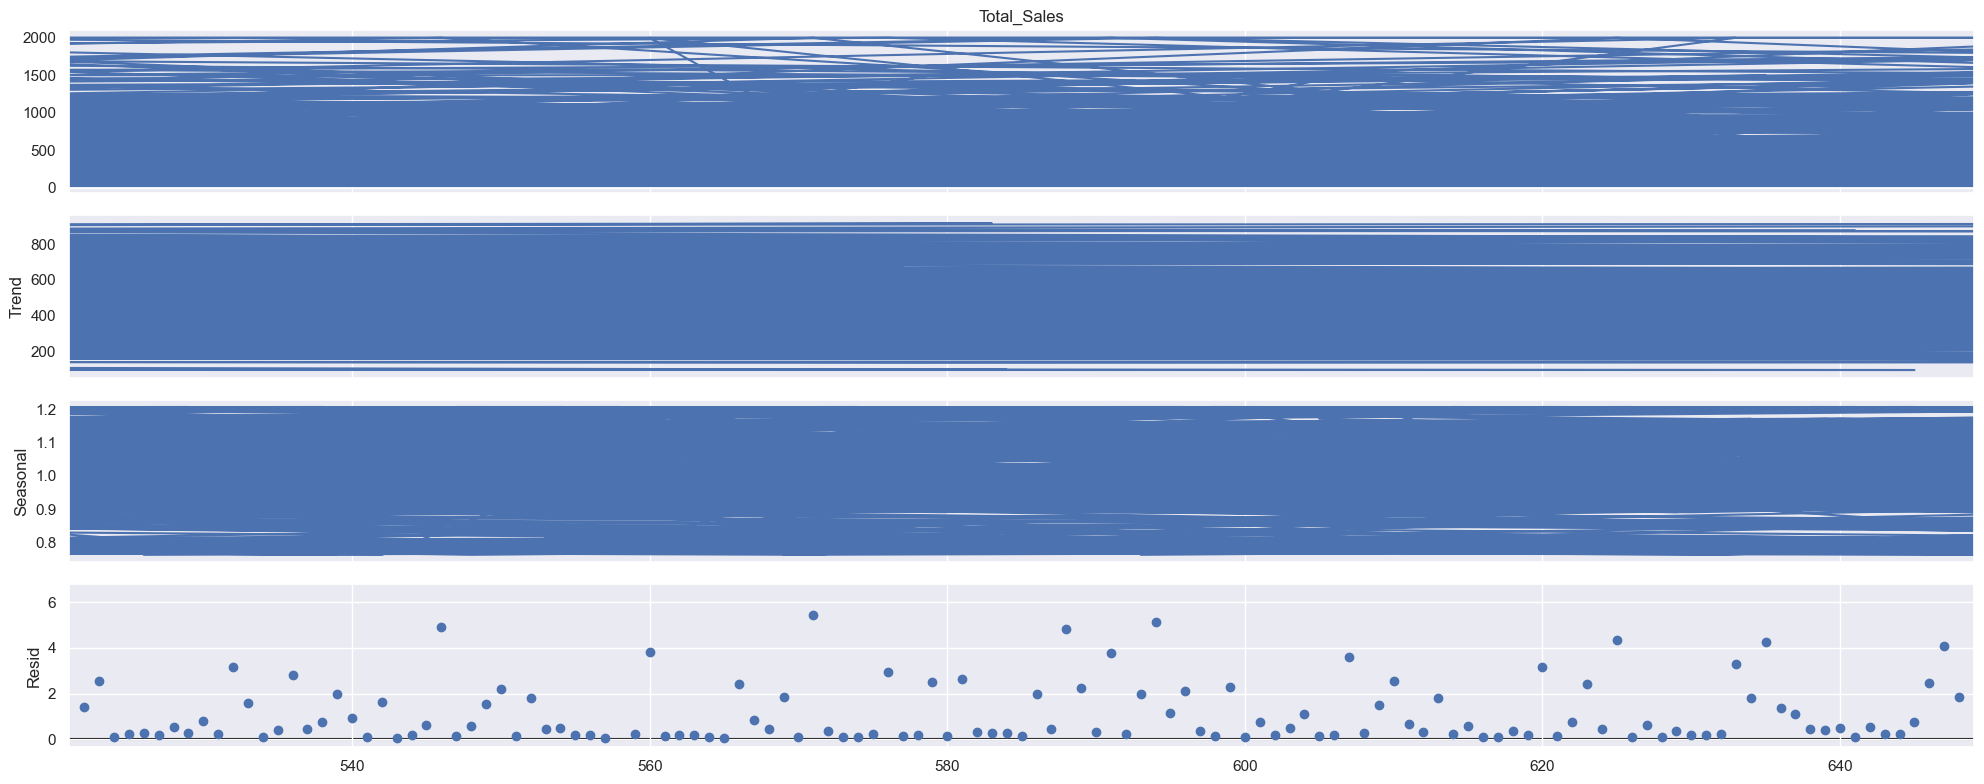

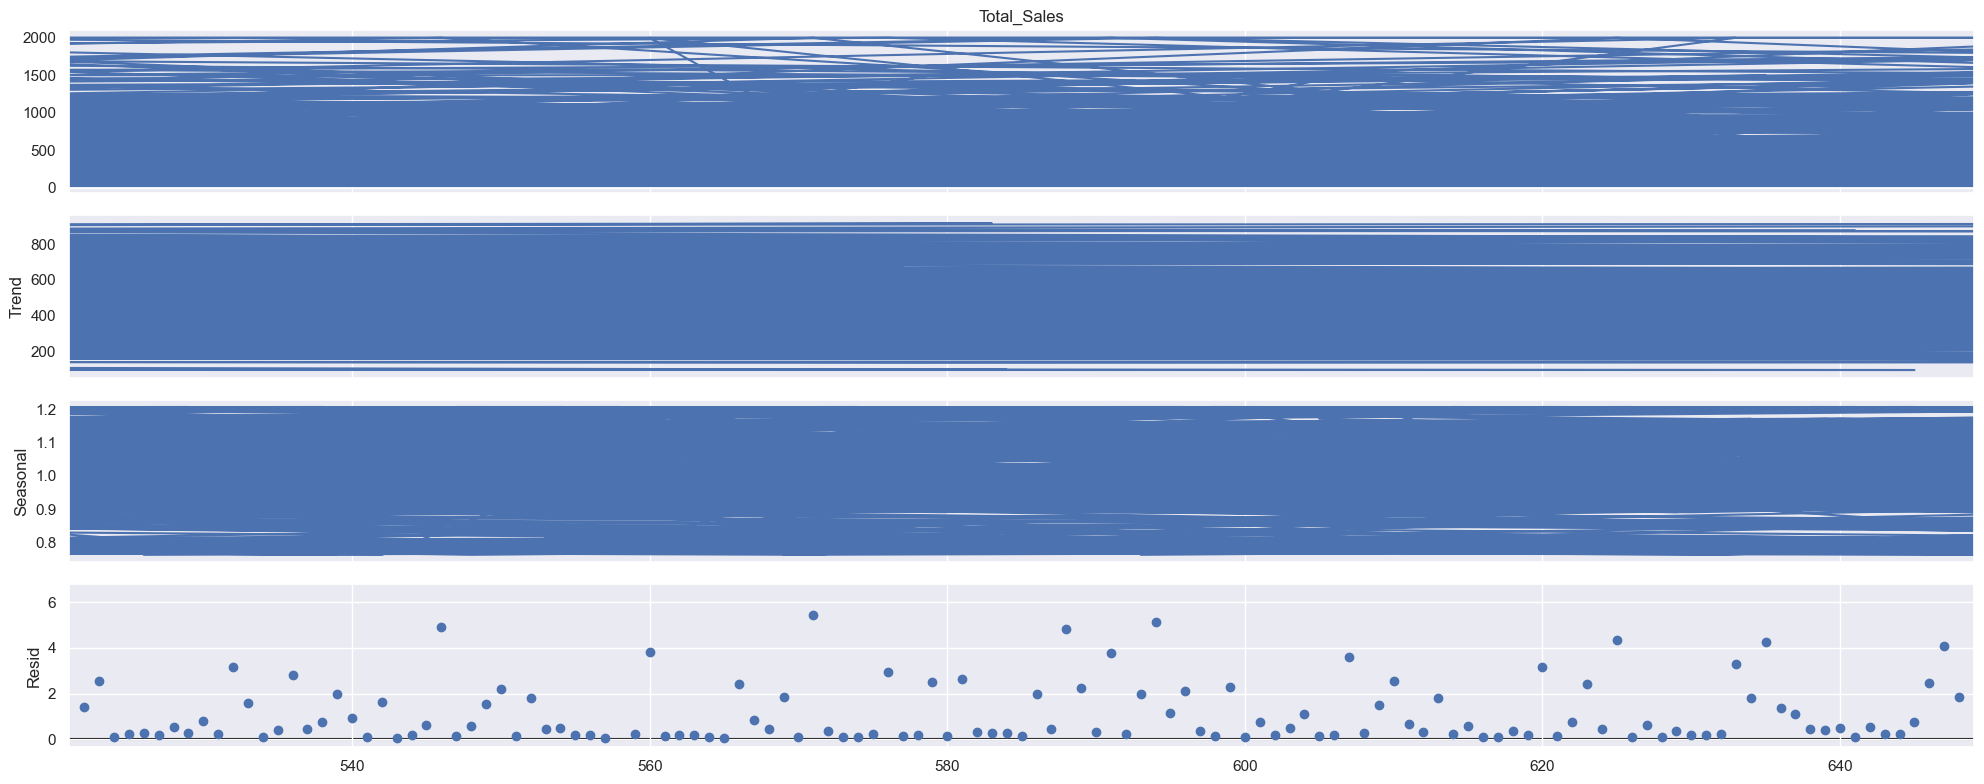

In [134]:
result=seasonal_decompose(df['Total_Sales'], model='multiplicative',period=12)
result.plot()

### 13.Extracting year and month from date Column 

In [135]:
df['year'] = pd.to_datetime(df['Date']).dt.year
print(df)

df['month'] = pd.to_datetime(df['Date']).dt.month
print(df)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
521             522  2023-01-01     CUST522    Male   46           Beauty   
179             180  2023-01-01     CUST180    Male   41         Clothing   
558             559  2023-01-01     CUST559  Female   40         Clothing   
302             303  2023-01-02     CUST303    Male   19      Electronics   
978             979  2023-01-02     CUST979  Female   19           Beauty   
..              ...         ...         ...     ...  ...              ...   
232             233  2023-12-29     CUST233  Female   51           Beauty   
804             805  2023-12-29     CUST805  Female   30           Beauty   
856             857  2023-12-31     CUST857    Male   60      Electronics   
210             211  2024-01-01     CUST211    Male   42           Beauty   
649             650  2024-01-01     CUST650    Male   55      Electronics   

     Quantity  Price per Unit  Total_Sales  year  
521         3           

In [136]:



# Trace creation 
import plotly.graph_objects as go

x_data = [2023,2024]
y_data = [0,2000]

# Define a trace (series) for temperature data
trace = go.Scatter(
    x=x_data,  # x-axis values
    y=y_data,  # y-axis values
    mode='lines+markers',  # Line and marker style
    name='Temperature'  # Name for the trace
)

# Create a figure and add the trace
fig = go.Figure(data=[trace])

# Display the plot
fig.show()






In [137]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total_Sales,year,month
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500,2023,1
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900,2023,1
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,2023,1
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90,2023,1
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25,2023,1
...,...,...,...,...,...,...,...,...,...,...,...
232,233,2023-12-29,CUST233,Female,51,Beauty,2,300,600,2023,12
804,805,2023-12-29,CUST805,Female,30,Beauty,3,500,1500,2023,12
856,857,2023-12-31,CUST857,Male,60,Electronics,2,25,50,2023,12
210,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500,2024,1


In [138]:

# df = df.sort_values(by='Date') 
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total_Sales,year,month
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500,2023,1
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900,2023,1
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,2023,1
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90,2023,1
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25,2023,1
...,...,...,...,...,...,...,...,...,...,...,...
232,233,2023-12-29,CUST233,Female,51,Beauty,2,300,600,2023,12
804,805,2023-12-29,CUST805,Female,30,Beauty,3,500,1500,2023,12
856,857,2023-12-31,CUST857,Male,60,Electronics,2,25,50,2023,12
210,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500,2024,1


### 13.Forecasting using Time Series Analysis using Exponential Smoothing Model

c:\Users\Netkom\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



345    1387.322689
346    1387.322689
347    1387.322689
348    1387.322689
349    1387.322689
350    1387.322689
351    1387.322689
352    1387.322689
353    1387.322689
354    1387.322689
355    1387.322689
356    1387.322689
357    1387.322689
358    1387.322689
359    1387.322689
360    1387.322689
361    1387.322689
362    1387.322689
363    1387.322689
364    1387.322689
365    1387.322689
366    1387.322689
367    1387.322689
368    1387.322689
dtype: float64


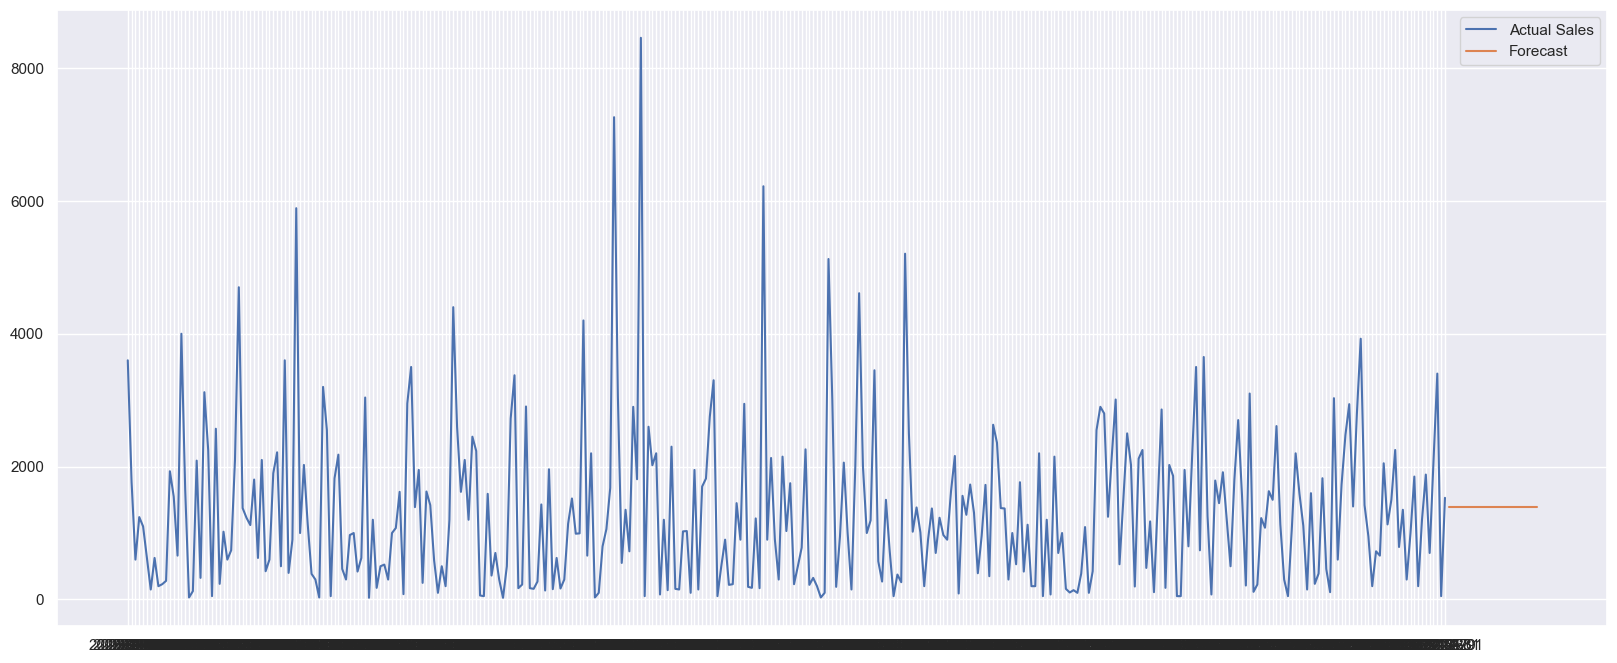

In [139]:

import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
import matplotlib.pyplot as plt  # for plotting (replace with your preferred library)

# # Preprocessing
Sales_data = df.groupby("Date")["Total_Sales"].sum().reset_index()

# # Exploratory Data Analysis (EDA)
# # Use libraries like matplotlib to visualize trends and seasonality in sales_data

# # Choose and Fit Model
model = ExponentialSmoothing(Sales_data["Total_Sales"])
model_fit = model.fit()

# # Forecast Future Sales
forecast = model_fit.forecast(steps=24)

# # Print forecast results
print(forecast)




# # Plot actual sales vs forecast 
plt.plot(Sales_data["Date"], Sales_data["Total_Sales"], label="Actual Sales")
plt.plot(forecast.index, forecast.values, label="Forecast")
plt.legend()
plt.show()





Summary: Forecasting is done via using Exponential smoothing Model